In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import graphviz 

In [2]:
base_dir =  '../data/npz_all/npz/tile/xla/train/'
OPCODES = {1: "abs", 2: "add", 3: "add-dependency", 4: "after-all", 5: "all-reduce", 6: "all-to-all", 7: "atan2", 8: "batch-norm-grad", 9: "batch-norm-inference", 10: "batch-norm-training", 11: "bitcast", 12: "bitcast-convert", 13: "broadcast", 14: "call", 15: "ceil", 16: "cholesky", 17: "clamp", 18: "collective-permute", 19: "count-leading-zeros", 20: "compare", 21: "complex", 22: "concatenate", 23: "conditional", 24: "constant", 25: "convert", 26: "convolution", 27: "copy", 28: "copy-done", 29: "copy-start", 30: "cosine", 31: "custom-call", 32: "divide", 33: "domain", 34: "dot", 35: "dynamic-slice", 36: "dynamic-update-slice", 37: "exponential", 38: "exponential-minus-one", 39: "fft", 40: "floor", 41: "fusion", 42: "gather", 43: "get-dimension-size", 44: "set-dimension-size", 45: "get-tuple-element", 46: "imag", 47: "infeed", 48: "iota", 49: "is-finite", 50: "log", 51: "log-plus-one", 52: "and", 53: "not", 54: "or", 55: "xor", 56: "map", 57: "maximum", 58: "minimum", 59: "multiply", 60: "negate", 61: "outfeed", 62: "pad", 63: "parameter", 64: "partition-id", 65: "popcnt", 66: "power", 67: "real", 68: "recv", 69: "recv-done", 70: "reduce", 71: "reduce-precision", 72: "reduce-window", 73: "remainder", 74: "replica-id", 75: "reshape", 76: "reverse", 77: "rng", 78: "rng-get-and-update-state", 79: "rng-bit-generator", 80: "round-nearest-afz", 81: "rsqrt", 82: "scatter", 83: "select", 84: "select-and-scatter", 85: "send", 86: "send-done", 87: "shift-left", 88: "shift-right-arithmetic", 89: "shift-right-logical", 90: "sign", 91: "sine", 92: "slice", 93: "sort", 94: "sqrt", 95: "subtract", 96: "tanh", 98: "transpose", 99: "triangular-solve", 100: "tuple", 102: "while", 103: "cbrt", 104: "all-gather", 105: "collective-permute-start", 106: "collective-permute-done", 107: "logistic", 108: "dynamic-reshape", 109: "all-reduce-start", 110: "all-reduce-done", 111: "reduce-scatter", 112: "all-gather-start", 113: "all-gather-done", 114: "opt-barrier", 115: "async-start", 116: "async-update", 117: "async-done", 118: "round-nearest-even", 119: "stochastic-convert", 120: "tan"}
FEATS = {0: "is_root", 1: "element_size_in_bits", 2: "shape_element_type_is_invalid_type", 3: "shape_element_type_is_pred", 4: "shape_element_type_is_s8", 5: "shape_element_type_is_s16", 6: "shape_element_type_is_s32", 7: "shape_element_type_is_s64", 8: "shape_element_type_is_u8", 9: "shape_element_type_is_u16", 10: "shape_element_type_is_u32", 11: "shape_element_type_is_u64", 12: "shape_element_type_is_f16", 13: "shape_element_type_is_f32", 14: "shape_element_type_is_f64", 15: "shape_element_type_is_bf16", 16: "shape_element_type_is_c64", 17: "shape_element_type_is_c128", 18: "shape_element_type_is_tuple", 19: "shape_element_type_is_opaque_type", 20: "shape_element_type_is_token", 21: "shape_dimensions_0", 22: "shape_dimensions_1", 23: "shape_dimensions_2", 24: "shape_dimensions_3", 25: "shape_dimensions_4", 26: "shape_dimensions_5", 27: "shape_dimensions_sum", 28: "shape_dimensions_product", 29: "shape_tuple_shapes_size", 30: "parameter_number", 31: "dimensions_0", 32: "dimensions_1", 33: "dimensions_2", 34: "dimensions_3", 35: "dimensions_4", 36: "dimensions_5", 37: "window_size_0", 38: "window_size_1", 39: "window_size_2", 40: "window_size_3", 41: "window_size_4", 42: "window_size_5", 43: "window_size_sum", 44: "window_size_product", 45: "window_stride_0", 46: "window_stride_1", 47: "window_stride_2", 48: "window_stride_3", 49: "window_stride_4", 50: "window_stride_5", 51: "window_stride_sum", 52: "window_stride_product", 53: "window_padding_low_0", 54: "window_padding_low_1", 55: "window_padding_low_2", 56: "window_padding_low_3", 57: "window_padding_low_4", 58: "window_padding_low_5", 59: "window_padding_low_sum", 60: "window_padding_low_product", 61: "window_padding_high_0", 62: "window_padding_high_1", 63: "window_padding_high_2", 64: "window_padding_high_3", 65: "window_padding_high_4", 66: "window_padding_high_5", 67: "window_padding_high_sum", 68: "window_padding_high_product", 69: "window_window_dilation_0", 70: "window_window_dilation_1", 71: "window_window_dilation_2", 72: "window_window_dilation_3", 73: "window_window_dilation_4", 74: "window_window_dilation_5", 75: "window_window_dilation_sum", 76: "window_window_dilation_product", 77: "window_base_dilation_0", 78: "window_base_dilation_1", 79: "window_base_dilation_2", 80: "window_base_dilation_3", 81: "window_base_dilation_4", 82: "window_base_dilation_5", 83: "window_base_dilation_sum", 84: "window_base_dilation_product", 85: "window_window_reversal_0", 86: "window_window_reversal_1", 87: "window_window_reversal_2", 88: "window_window_reversal_3", 89: "window_window_reversal_4", 90: "window_window_reversal_5", 91: "window_window_reversal_true_count", 92: "window_window_reversal_false_count", 93: "convolution_dim_numbers_input_batch_dim", 94: "convolution_dim_numbers_input_feature_dim", 95: "convolution_dim_numbers_input_spatial_dims_0", 96: "convolution_dim_numbers_input_spatial_dims_1", 97: "convolution_dim_numbers_input_spatial_dims_2", 98: "convolution_dim_numbers_input_spatial_dims_3", 99: "convolution_dim_numbers_kernel_input_feature_dim", 100: "convolution_dim_numbers_kernel_output_feature_dim", 101: "convolution_dim_numbers_kernel_spatial_dims_0", 102: "convolution_dim_numbers_kernel_spatial_dims_1", 103: "convolution_dim_numbers_kernel_spatial_dims_2", 104: "convolution_dim_numbers_kernel_spatial_dims_3", 105: "convolution_dim_numbers_output_batch_dim", 106: "convolution_dim_numbers_output_feature_dim", 107: "feature_group_count", 108: "batch_group_count", 109: "slice_dims_start_0", 110: "slice_dims_start_1", 111: "slice_dims_start_sum", 112: "slice_dims_start_product", 113: "slice_dims_stride_0", 114: "slice_dims_stride_1", 115: "slice_dims_stride_sum", 116: "slice_dims_stride_product", 117: "slice_dims_limit_0", 118: "slice_dims_limit_1", 119: "slice_dims_limit_sum", 120: "slice_dims_limit_product", 121: "dynamic_slice_sizes_0", 122: "dynamic_slice_sizes_1", 123: "dynamic_slice_sizes_sum", 124: "dynamic_slice_sizes_product", 125: "padding_config_edge_padding_low_0", 126: "padding_config_edge_padding_low_1", 127: "padding_config_edge_padding_low_sum", 128: "padding_config_edge_padding_low_product", 129: "padding_config_edge_padding_high_0", 130: "padding_config_edge_padding_high_1", 131: "padding_config_edge_padding_high_sum", 132: "padding_config_edge_padding_high_product", 133: "is_stable", 134: "layout_minor_to_major_0", 135: "layout_minor_to_major_1", 136: "layout_minor_to_major_2", 137: "layout_minor_to_major_3", 138: "layout_minor_to_major_4", 139: "layout_minor_to_major_5"}
CONFIG_VARS = {0: "output_layout_0", 1: "output_layout_1", 2: "output_layout_2", 3: "output_layout_3", 4: "output_layout_4", 5: "output_layout_5", 6: "input_layout_0", 7: "input_layout_1", 8: "input_layout_2", 9: "input_layout_3", 10: "input_layout_4", 11: "input_layout_5", 12: "kernel_layout_0", 13: "kernel_layout_1", 14: "kernel_layout_2", 15: "kernel_layout_3", 16: "kernel_layout_4", 17: "kernel_layout_5"}

TILE_VARS = {0: 'kernel_bounds_0', 1: 'kernel_bounds_1', 2: 'kernel_bounds_2', 3: 'kernel_bounds_3', 4: 'kernel_bounds_4', 5: 'kernel_bounds_5', 6: 'kernel_bounds_sum', 7: 'kernel_bounds_product', 8: 'output_bounds_0', 9: 'output_bounds_1', 10: 'output_bounds_2', 11: 'output_bounds_3', 12: 'output_bounds_4', 13: 'output_bounds_5', 14: 'output_bounds_sum', 15: 'output_bounds_product', 16: 'input_bounds_0', 17: 'input_bounds_1', 18: 'input_bounds_2', 19: 'input_bounds_3', 20: 'input_bounds_4', 21: 'input_bounds_5', 22: 'input_bounds_sum', 23: 'input_bounds_product'}

In [3]:
graphs=os.listdir(base_dir)
print(len(graphs), '*nice*')
print(graphs)

5709 *nice*
['resnet_v2_152_batch_64_352126f223beb42.npz', 'inception_v2_batch_128_train_6d45e8cf128f2d5e.npz', 'inception_v2_batch_8_train_5adc1fe8cca83f75.npz', 'resnet_v2_50_batch_128_-52860aa70b8a2b5a.npz', 'inception_v3_batch_8_train_-49a4e0f2bd609804.npz', 'inception_v3_batch_8_train_-2766c94e7e424f19.npz', 'transformer_tf2_dynamic_shape_249d65cd29571750.npz', 'inception_v2_batch_128_train_573552980286f0c9.npz', 'tf2_bert_squad_dynamic_-58f443b09c54fd59.npz', 'bert_classifier.2x2.fp32.performance_-5e45f791e9d570c8.npz', 'resnet_v2_50_batch_16_5e4194844131bd75.npz', 'bert_pretraining.2x2.fp16_a35ebdeb43b3809.npz', 'transformer.4x4.bf16_2fa83d92516f4834.npz', 'mlperf_nmt_1_shard_batch_64_-5e8c6cb0241522ae.npz', 'tf2_bert_pretrain_dynamic_sequence_length_736410ae70a4ddca.npz', 'mnasnet_a1_batch_128_b7bc3564041b4a7.npz', 'mlperf_nmt_1_shard_batch_64_5e9c7606696fb76b.npz', 'tf2_bert_pretrain_dynamic_sequence_length_7421f45ba45fb97a.npz', 'bert_pretraining.8x16.fp16_6c9ce9ced927fa83.np

In [96]:
graph_name = graphs[8]
print(graph_name)
graph = np.load(base_dir + graph_name)
print(type(graph))
runtimes = graph['config_runtime'] / graph['config_runtime_normalizers']
sorted_indices = np.argsort(runtimes)

sorted_configs = graph['config_feat'][sorted_indices]
sorted_runtimes = runtimes[sorted_indices]

print(len(graph.items()))
for k, v in graph.items():
    print(k, v.shape)

tf2_bert_squad_dynamic_-58f443b09c54fd59.npz
<class 'numpy.lib.npyio.NpzFile'>
6
node_feat (40, 140)
node_opcode (40,)
edge_index (40, 2)
config_feat (1370, 24)
config_runtime (1370,)
config_runtime_normalizers (1370,)


In [97]:
edge_index = graph['edge_index']
node_opcode = graph['node_opcode']

# Create a directed or undirected graph
dot = graphviz.Digraph(comment='My Graph')

# Add nodes
for i, opcode in enumerate(node_opcode):
    dot.node(str(i), OPCODES[opcode])

# Add edges
for end, start in edge_index:
    dot.edge(str(start), str(end))

# Visualize the graph
dot.render('output_graph', view=True)

'output_graph.pdf'

In [92]:
graph['config_feat'][:, :8].sum()

0.0

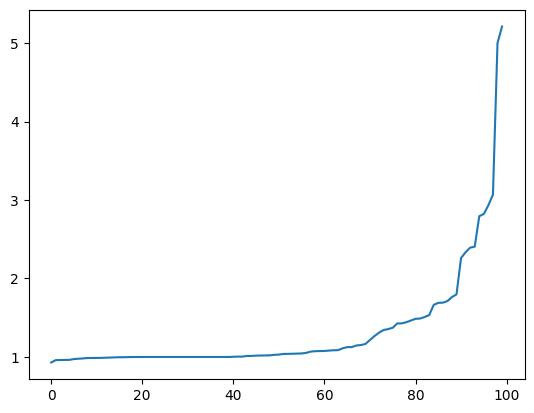

In [93]:
plt.plot(sorted_runtimes)

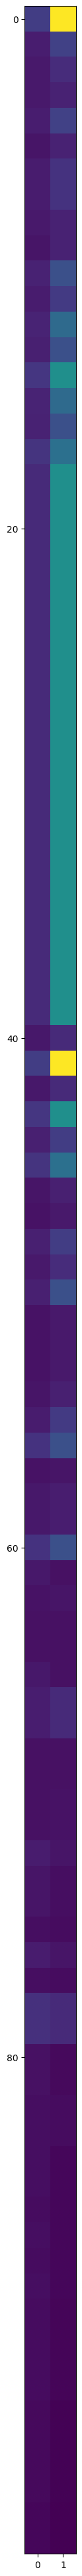

In [94]:
fig, ax = plt.subplots(figsize=(1, 500))
ax.imshow(sorted_configs[:, 14:16])

In [95]:
sorted_configs[:10, 8:16]

array([[  1.,   1.,  20.,   8.,   0.,   0.,  30., 160.],
       [  1.,   1.,   4.,   8.,   0.,   0.,  14.,  32.],
       [  1.,   1.,   7.,   3.,   0.,   0.,  12.,  21.],
       [  1.,   1.,   2.,   8.,   0.,   0.,  12.,  16.],
       [  1.,   1.,   4.,   8.,   0.,   0.,  14.,  32.],
       [  1.,   1.,   4.,   4.,   0.,   0.,  10.,  16.],
       [  1.,   1.,   3.,   8.,   0.,   0.,  13.,  24.],
       [  1.,   1.,   3.,   8.,   0.,   0.,  13.,  24.],
       [  1.,   1.,   2.,   8.,   0.,   0.,  12.,  16.],
       [  1.,   1.,   4.,   4.,   0.,   0.,  10.,  16.]], dtype=float32)